# Basic Examples of Batch

In [1]:
import graphlearning.active_learning as al
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import os
import utils
import batch_active_learning as bal

## Dataset generation

In [2]:
num_points = 2000
X = np.random.uniform(size = (num_points, 2))
labels = np.zeros(num_points, dtype=int)
labels[X[:, 1] - 3*(X[:, 0]-.5)**2 < .2] = 1
W = gl.weightmatrix.knn(X, 20, kernel = 'distance')
G = gl.graph(W)
train_ind = []

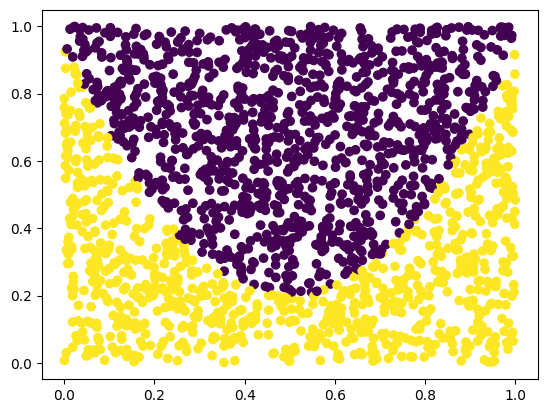

In [3]:
fig0 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

## Active learning stuff

In [4]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .2, 1.0), initial=list(train_ind));
print("Coreset = ", coreset)

Coreset =  [1534, 1330, 200, 1622, 1141, 375, 1297, 174, 1797, 1576, 1602, 1577, 1282, 718, 587, 1515, 308, 53, 179]


In [5]:
#AL Objects
model = gl.ssl.laplace(W, None, reweighting='poisson')
acq = al.model_change_vopt()
act = al.active_learning(W, coreset, labels[coreset], eval_cutoff=min(200, len(X) // 2))
u = model.fit(act.current_labeled_set, act.current_labels)  # perform classification with GSSL classifier

act.candidate_inds = np.setdiff1d(act.training_set, act.current_labeled_set)
acq_vals = acq.compute_values(act, u)

modded_acq_vals = np.zeros(len(X))
modded_acq_vals[act.candidate_inds] = acq_vals

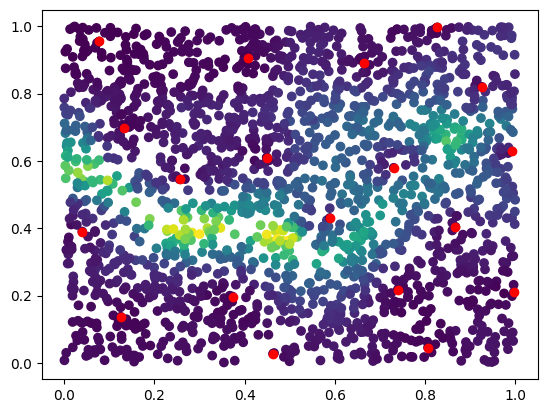

In [6]:
fig1 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.show()

In [7]:
LM_batch, _, _ = bal.coreset_run_experiment(X, labels, W, coreset, num_iter=1, method='Laplace',
                           display=False, use_prior=False, al_mtd='local_max', debug=False,
                           acq_fun='mcvopt', batchsize=5)
LM_batch = np.setdiff1d(LM_batch, coreset)
batch_size = len(LM_batch)

In [8]:
highest = np.argsort(modded_acq_vals)[-batch_size:]

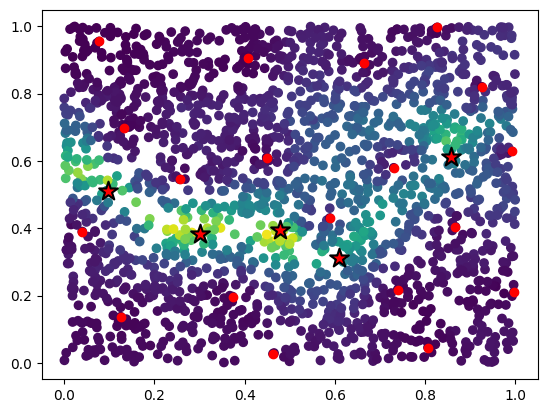

In [9]:
fig2 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[LM_batch, 0], X[LM_batch, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.show()

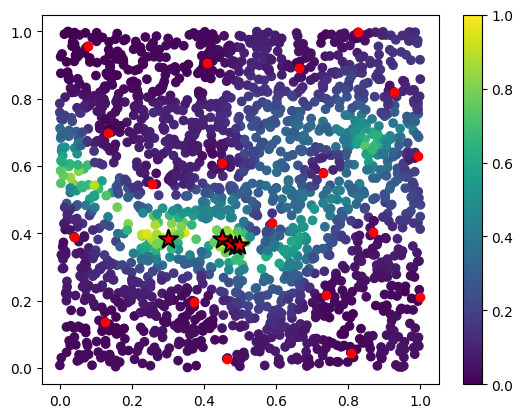

In [10]:
fig3 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[highest, 0], X[highest, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
tmp = plt.colorbar()
plt.show()

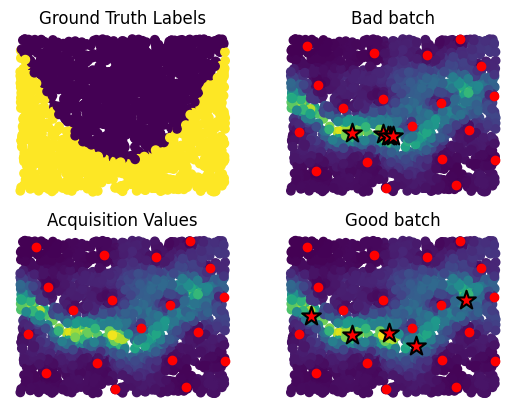

In [11]:
#fig_all, axes = plt.subplots(nrows=2, ncols=2)
fig_all = plt.figure()
plt.subplot(221) 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Ground Truth Labels")
plt.axis('off')
#plt.show()

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[highest, 0], X[highest, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.title("Bad batch")
plt.axis('off')
#plt.show()

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.title("Acquisition Values")
plt.axis('off')
#plt.show()


plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=modded_acq_vals)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.scatter(X[LM_batch, 0], X[LM_batch, 1], c='r', marker='*', s=200, edgecolors='k', linewidths=1.5)
plt.title("Good batch")
plt.axis('off')
#plt.show()

#cbar = fig_all.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

#fig_all.colorbar(tmp)
plt.savefig("BAL Examples/SimpleBatchExamples.jpg")
plt.show()


## Checkerboard heatmap and local maxes

In [12]:
#Used in paper
np.random.seed(0)

#Make data set
X, labels = bal.gen_checkerboard_3(num_samples=5000)

In [13]:
#Create graph learning objects
W = gl.weightmatrix.knn(X, 20, kernel = 'distance')
G = gl.graph(W)

#Generate coreset
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .2, 1.0));
print("Coreset = ", coreset)


Coreset =  [3582, 4638, 2192, 1111, 1075, 4866, 1829, 4011, 1976, 1776, 1025, 3620, 4406, 3085, 3964, 1959, 3965, 3590, 639, 3250, 3215, 2875, 120, 4846, 1050]


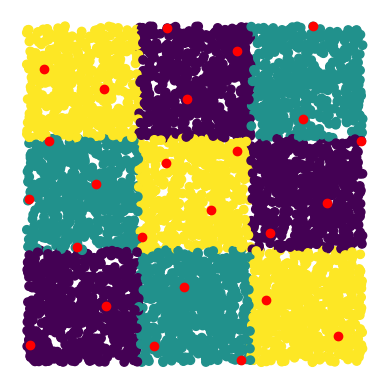

In [14]:
#plot
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(X[coreset, 0], X[coreset, 1], c='r')
plt.axis('square')
plt.axis('off')
#plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.savefig('BAL Examples/checkerboard.jpg',bbox_inches='tight')
plt.show()

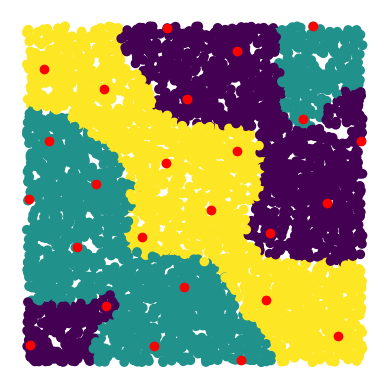

Size of coreset =  25
Using  0.5 % of the data
Current Accuracy is  79.15577889447236 %


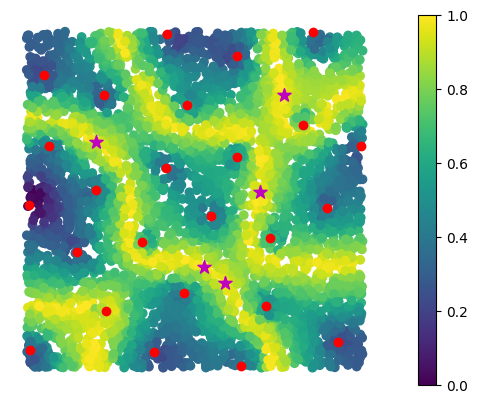

Next batch is [2598 1377 4894 3443  329]
Current number of labeled nodes 30
Current Accuracy is  80.20120724346077 %


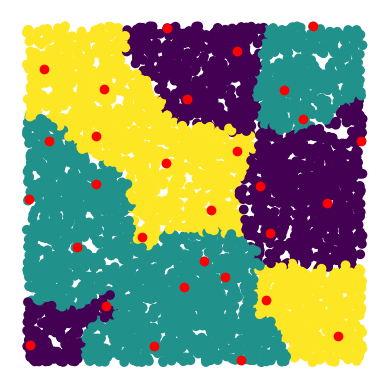

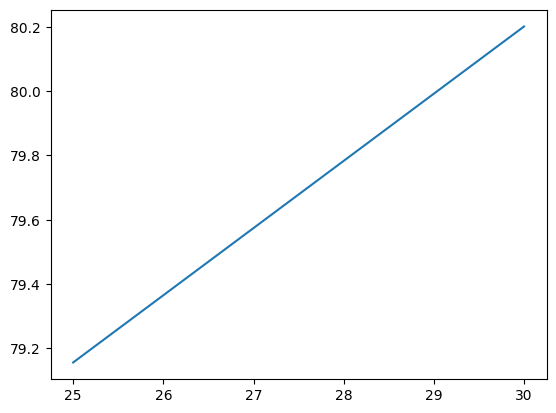

(array([3582, 4638, 2192, 1111, 1075, 4866, 1829, 4011, 1976, 1776, 1025,
        3620, 4406, 3085, 3964, 1959, 3965, 3590,  639, 3250, 3215, 2875,
         120, 4846, 1050, 2598, 1377, 4894, 3443,  329]),
 [25, 30],
 array([79.15577889, 80.20120724]))

In [15]:
bal.coreset_run_experiment(X, labels, W, coreset, acq_fun='uc', display=True, savefig=True, savefig_folder='BAL Examples/')